In [1]:
import sys
sys.path.append('..')

import pickle as pkl

# Load data

In [2]:
filepath = 'track_log_data.pkl'

log = pkl.load(open(filepath,'rb'))


In [15]:
log

{'est_locs_log': {'multi_lateration': array([[11.2076807 ,  4.6541214 ],
         [ 7.0768466 ,  5.11217594],
         [ 5.9907136 ,  5.620399  ],
         [ 4.57238722,  5.44131327],
         [ 5.16993093,  5.62657213],
         [ 6.05080652,  6.1012125 ],
         [ 6.26183271,  6.16447496],
         [ 5.75843477,  6.13541317],
         [ 6.34817743,  6.4514637 ],
         [ 6.5426321 ,  6.69272375],
         [ 6.73459148,  6.84566259],
         [ 6.81348515,  7.02779007],
         [ 6.92147684,  7.09713984],
         [ 7.10803556,  7.28277397],
         [ 7.30188084,  7.43743944],
         [ 7.53144169,  7.57781172],
         [ 7.64370203,  7.68088055],
         [ 7.76715755,  7.77496338]]),
  'pf': array([[ -4.14182091,  28.70692825],
         [  0.30116931,  28.2536087 ],
         [ -4.41363764,  29.09464073],
         [ -3.30625701,  26.67635536],
         [ -3.5541122 ,  27.27088928],
         [ -5.49436235,  29.59074783],
         [ -5.89888811,  29.34418297],
         [ -5.512

# Plot location estimation trajectory and sensor trajectory

In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('fivethirtyeight')
    
def plot_trajectory(ax,traj,name,marker):
    def direction_at(i):
        direction = traj[i+1,:]-traj[i,:]
        return traj[i,0],traj[i,1], direction[0],direction[1]
    n=5
    arrow_ind = [len(traj)-2]
    for ind in arrow_ind:
        ax.arrow(*direction_at(ind),shape='full', lw=0, length_includes_head=True, head_width=0.4,)
    
    ax.plot(traj[:,0],traj[:,1],marker,label=name)
    

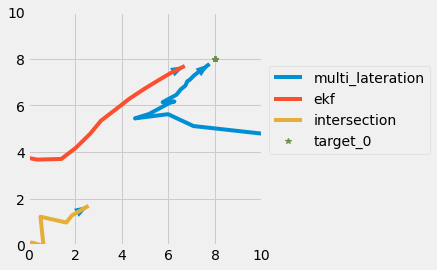

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for key,val in log['est_locs_log'].items():
    if key!='pf':
        plot_trajectory(ax,val,key,'')
# for key,val in log['sensor_locs'].items():
#     plot_trajectory(ax,val,key,'.')

for key,val in log['target_locs'].items():
    plot_trajectory(ax,val,key,'*')
    
ax.set_xlim((0,10))
ax.set_ylim((0,10))
ax.set_aspect('equal')
# Change the (x,y) value in bbox_to_anchor argument to change the position of the legend box
plt.legend(loc='upper left',bbox_to_anchor=(1, .8))
plt.show()

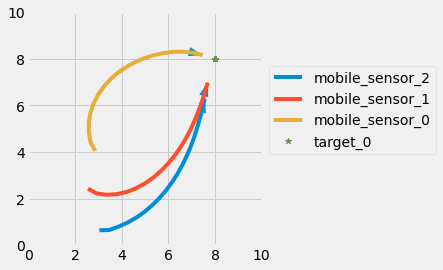

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for key,val in log['sensor_locs'].items():
    plot_trajectory(ax,val,key,'')
    

for key,val in log['target_locs'].items():
    plot_trajectory(ax,val,key,'*')


ax.set_xlim((0,10))
ax.set_ylim((0,10))

ax.set_aspect('equal')
# Change the (x,y) value in bbox_to_anchor argument to change the position of the legend box
plt.legend(loc='upper left',bbox_to_anchor=(1, .8))
plt.show()

# Animate the plots

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlim((0,10))
ax.set_ylim((0,10))

ax.set_aspect('equal')
# Change the (x,y) value in bbox_to_anchor argument to change the position of the legend box
plt.legend(loc='upper left',bbox_to_anchor=(1, .8))



line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
plt.show()
